In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import *
import sympy.physics.mechanics as mech
mech.init_vprinting()

<h1> Equação do Movimento - Lagrangiana </h1>

<p style="text-align: justify">Encontre as equações do movimento do problema de duas cargas de massas $m_1$ e $m_2$ e cargas, $q_1$ e $q_2$ respectivamente. Estas cargas estão acopladas uma com a outra por uma mola de massa $k$ e se movimentam em apenas uma dimensão. O mesmo modelo simplificado é capaz de prever propriedades de plasmons em superfícies</p>

<hr></hr>

<p style="text-align: justify"> Primeiro escrevemos a Lagrangiana do sistema. Como as cargas estão aclopadas e se movem apenas em uma dimensão (vamos considerar que elas se movem em $x$), a energia cinética do sistema é escrita como </p>

<p style="text-align: center"> $$ T = \frac{m_{1} \dot{x_{1}}^2}{2} + \frac{m_{2} \dot{x_{2}}^2}{2} $$ </p>

<p style="text-align: justify"> Já a energia potencial é dada pelo potencial eletrico das cargas mais a força elástica da mola, desta forma, </p>

<p style="text-align: center">$$ V = \frac{q_{1}q_{2}}{4\pi\epsilon_{0}\sqrt{(x_{2}-x_{1})^2}} + \frac{k(x_{2}-x_{1})^2}{2} $$ </p>

<p style="text-align: justify"> desta forma, escrevemos a Lagrangiana: </p>

<p style="text-align: center"> $$ L = \frac{m_{1}\dot{x_{1}}^2 + m_{2}\dot{x_{2}}^2}{2} - \left[\frac{q_{1}q_{2}}{4\pi\epsilon_{0}\sqrt{(x_{2}-x_{1})^2}} + \frac{k(x_{2}-x_{1})^2}{2}\right] $$ </p>

In [2]:
# declarando variáveis e constantes 
m_1, m_2 = symbols('m_1 m_2', positive=True)
q_1, q_2 = symbols('q_1 q_2', positive=True)
pi, e_0, k = symbols('pi e_0 k', positive=True)
t = symbols('t', real=True)
x_1 = Function('x_1')(t)
x_2 = Function('x_2')(t)

Energia cinética (T) do problema:


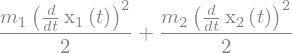


Energia potencial (V) do problema:


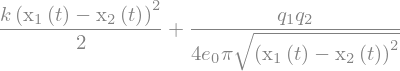

In [3]:
# escrevendo as equações 
T = Rational(1,2)*m_1*x_1.diff(t)**2 + Rational(1,2)*m_2*x_2.diff(t)**2
V = (q_1*q_2)/(4*pi*e_0*sqrt((x_1-x_2)**2)) + Rational(1,2)*k*(x_1-x_2)**2
L = T - V

# visualizando os resultados 
print("Energia cinética (T) do problema:")
display(T)
print()

print("Energia potencial (V) do problema:")
display(V)
print()

Lagrangiana (L = T - V) do sistema:


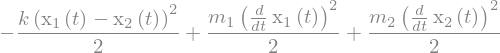

In [4]:
L = (T - V).subs(q_1, 0)

print("Lagrangiana (L = T - V) do sistema:")
display(L)

<p style="text-align: justify"> A equação de Euler - Lagrange é escrita como</p>

<p style="text-align: center"> $$ \frac{\partial L}{\partial x} \frac{d}{dt} \left( \frac{\partial L}{ \partial \dot{x}} \right) = 0 $$ </p>

<p style="text-align: justify"> resolvendo para $x_1$ e para $x_2$: </p>

A equação de Euler-Lagrange que descreve a fase estacionaria de x_1 é


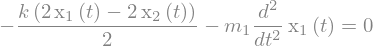


A equação de Euler-Lagrange que descreve a fase estacionaria de x_2 é


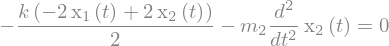

In [5]:
# para x_1
Elx1 = Eq(L.diff(x_1) - L.diff(x_1.diff(t)).diff(t),0)

print("A equação de Euler-Lagrange que descreve a fase estacionaria de x_1 é")
display(Elx1)

print()

# para x_2
Elx2 = Eq(L.diff(x_2) - L.diff(x_2.diff(t)).diff(t),0)

print("A equação de Euler-Lagrange que descreve a fase estacionaria de x_2 é")
display(Elx2)

print()

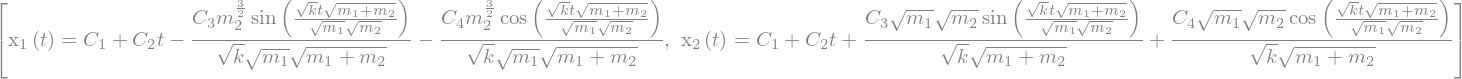

In [6]:
dsolve([Elx1,Elx2])

<hr></hr>
<h1> Potencial de elétrico </h1>

<p style="text-align: justify"> Encontre o ponto de mínimo e a constante elástica em termos de $D$ e $r_e$ do seguinte potencial</p>  

<p style="text-align: center"> $$ V(r) = D \ [1 - e^{-a(r-r_{e})}]^2 $$ </p>

<p style="text-align : justify"> onde $r$ representa a distância de um objeto em relação à origem do potencial </p>

In [7]:
# declarando as variaveis
D = symbols('D',real=True)
r_e = symbols('r_e', real=True)
r = symbols('r', positive=True)
a = symbols('a', real=True)

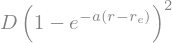

In [8]:
V = D * (1 - sp.exp(-a*(r - r_e)))**2

display(V)

Text(0, 0.5, '$V(V_0)$')

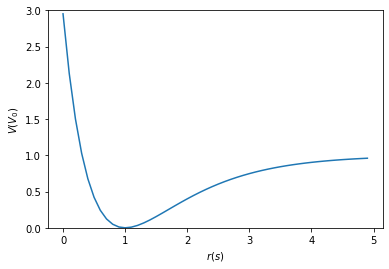

In [9]:
# plot da função
fig, ax = plt.subplots()
plt.ylim(0, 3) # delimitando os pontos do eixo y 

x = np.arange(0, 5, 0.1)
f1 = lambdify(r, V.subs(D,1).subs(r_e,1).subs(a,1), "numpy") #Aqui traduz-se uma função do sympy para o numpy, substituindo alguns valores
y = f1(x)


ax.plot(x, y)
plt.xlabel(r"$r(s)$")
plt.ylabel(r"$V(V_0)$")

<p style="text-align: justify"> O ponto de mínimo ocorre quando a derivada da função é 0, ou seja </p>

<p style="text-align: center"> $$ \frac{dV(r)}{dr_e} = 0 $$ </p>

<p style="text-align: justify"> desta forma, encontramos primeiro a derivada da função $V(r)$ e resolver para $r_e$, achando assim, o ponto de mínimo do potencial: </p>

Primeira derivada de V(r) em função de r_e:


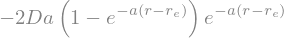

Ponto de mínima de V(r):


In [19]:
derivada_1_V = diff(V, r_e)
print("Primeira derivada de V(r) em função de r_e:")
display(derivada_1_V)

print("Ponto de mínima de V(r):")
r_0 = solve(derivada_1_V,r_e)
display(r_0)

<p style="text-align: justify"> Já para encontrar a constante elástica, usa-se a segunda derivada da função, tal que:</p>

<p style="text-align: center"> $$k = \frac{d^2V(r_e)}{dr_{e}^2}$$ </p>

Derivada segunda no ponto de mínima (constante elastica)


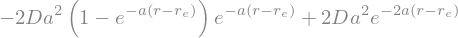

In [18]:
print("Derivada segunda no ponto de mínima (constante elastica)")
derivada_2_V = diff(V_derivado, r_e)
display(derivada_2_V.subs(r_e,r_0))